In [189]:
#importing the necessary libraries
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import random
import math
from matplotlib import pyplot
import matplotlib.pyplot as plt

In [190]:
#randomnly generating 441 points using the given mapping function along with labels
data = pd.DataFrame([])
# count=0
label=0
for i in range(21):
    x_i=-2+(0.2*i)
    for j in range(21):
        
        x_j=-2+(0.2*j)
        f_x=(x_i*x_i)+(x_j*x_j)
        if(f_x<=1):
            label=+1
        elif(f_x>1):
            label=-1
        data = data.append(pd.DataFrame({'i': x_i, 'j': x_j,'Label':label}, index=[0]), ignore_index=True)
# print(data)
data_model=data.copy()
data_model=data_model.to_numpy()
#Randomizing the generated data to train the model better
randomized_val = np.arange(len(data_model))
np.random.shuffle(randomized_val)
data_model=data_model[randomized_val]

In [191]:
#Splitting the data into test and train in the ration of 7:3
train_size = int(0.7 * len(data))
# Split your dataset 
train_set = data_model[:train_size]
test_set = data_model[train_size:]
x_train=train_set[0:,:-1]
x_test=test_set[0:,:-1]
y_train=train_set[0:,2:]
y_test=test_set[0:,2:]

In [192]:
#creating the model for rbf neural network
class rbf_nn:
    def __init__(self, hidden_nodes,no_of_centers,sigma=0.04,kMeans=False):
        self.hidden_nodes = hidden_nodes
        self.sigma = sigma
        self.no_of_centers=no_of_centers
        self.centers = None
        self.weights = None
        self.kMeans=kMeans
    #gaussian kernel function
    def gaussiankernel(self, center, point):
        return np.exp(-1 / (2 * self.sigma**2)*np.linalg.norm(point-center)**2)
    #sigmoid activation function
    def signum(self,x):
         return abs(x)/x
    #computing the gaussian kernel matrix G for transformation 
    def compute_g(self, X):
        G = np.zeros((len(X), self.hidden_nodes))
        for i, j in enumerate(X):
            for p, q in enumerate(self.centers):
                G[i, p] = self.gaussiankernel(q,j)
        return G
    #selecting random centers for the cluster
    def random_center(self, X):
        random_args = np.random.choice(len(X),self.no_of_centers)
        centers = X[random_args]
        return centers
    #fitting the model for a given set of data and centers
    def fit_model(self, X, Y):
        if(self.kMeans==False):
            self.centers = self.random_center(X)
        else:
            self.centers=KMeans(n_clusters=150, random_state=0).fit(X)
            self.centers=self.centers.cluster_centers_
        #print("data",len(X))
        #print("center",len(self.centers))
        G = self.compute_g(X)
        self.weights = np.dot(np.linalg.pinv(G),Y)
    #predicting the labels for the test data set
    def predict(self, X):
        G = self.compute_g(X)
        predictions = np.dot(G, self.weights)
        #print(predictions)
        predictions=self.signum(predictions)
        return predictions
    #calculating the accuracy between obtained value and target value
    def accuracy(self, y_obtained, y_original):
        sum = 0
        for i in range(len(y_obtained)):
            if (y_obtained[i] == y_original[i]):
                sum += 1
        accuracy = sum/len(y_obtained)
        #print(accuracy)
        return accuracy
    #calculating the mean square error to measure performance for different spread functions
    def MSE(self,y_obtained,y_original):
        mse=np.square(np.subtract(y_original,y_obtained)).mean() 
        #print(mse)
        return mse

In [193]:
#deciding the best sigma value for the rbf considering all data points as centers
sigma_vals = [0.1,0.35,0.5,0.6,0.7,0.8,0.9,1,3,5,7.5,10]
mse_plt=[]
accuracy_plt=[]
analysis = pd.DataFrame([])
#for each value of sigma the model is run considering all the data points as center to select optimal sigma
for i in sigma_vals:
    model=rbf_nn(len(x_train),len(x_train),i)
    model.fit_model(x_train,y_train)
    y_obtained=model.predict(x_test)
    accuracy=model.accuracy(y_obtained,y_test)
    accuracy_plt.append(accuracy)
    mse_obtained=model.MSE(y_obtained,y_test)
    mse_obtained=round(mse_obtained,2)
    analysis = analysis.append(pd.DataFrame({'sigma': i, 'accuracy': accuracy,'mse':mse_obtained}, index=[0]), ignore_index=True)
    mse_plt.append(mse_obtained)

In [194]:
analysis

,sigma,accuracy,mse
0,0.10,0.954887,0.18
1,0.35,0.932331,0.27
2,0.50,0.947368,0.21
3,0.60,0.932331,0.27
4,0.70,0.947368,0.21
5,0.80,0.939850,0.24
6,0.90,0.932331,0.27
7,1.00,0.894737,0.42
8,3.00,0.992481,0.03
9,5.00,0.984962,0.06


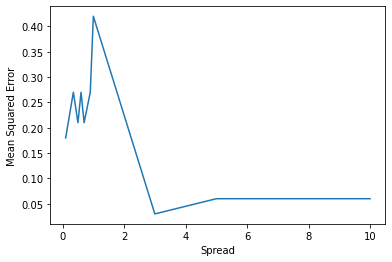

In [195]:
#plotting the spread value against mse
plt.plot(sigma_vals,mse_plt)
plt.xlabel("Spread")
plt.ylabel("Mean Squared Error")
plt.show()

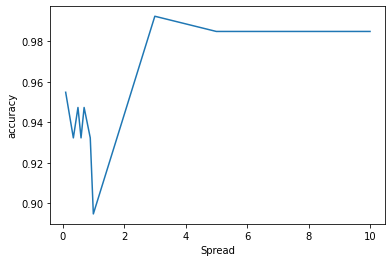

In [196]:
#plotting the spread value against accuracy
plt.plot(sigma_vals,accuracy_plt)
plt.xlabel("Spread")
plt.ylabel("accuracy")
plt.show()

### ANALYSIS:

I have considered the following sigma values: 0.1,0.35,0.5,0.6,0.7,0.8,0.9,1,3,5,7.5,10
The data is constructed and randomized.The randomization is kept the same by giving a seed value.Now initially we consider all the data points as the centers.

In this scenario,I am obtaining the accuracy and the mean square error for all values of sigma and we are able to observe that for the value of sigma=3 am obtaining the maximum accuracy and the minimal mse so am considering sigma =3 to the optimal value for the model and proceeding to implement the same model of rbf with 150 centers chosen at random and 150 centers chosen using the kmeans algorithm implemented in sklearn library.

The maximum accuracy obtained with all data points as centers is 0.992481 and the mse is 0.03

In [197]:
#randomnly choosing 150 centers and computing the accuracy for the best sigma value
sigma_vals = [0.1,0.35,0.5,0.6,0.7,0.8,0.9,1,3,5,7.5,10]
mse_plt=[]
accuracy_plt=[]
analysis = pd.DataFrame([])
for i in sigma_vals:
    model1=rbf_nn(len(x_train),150,2)
    model1.fit_model(x_train,y_train)
    y_obtained=model1.predict(x_test)
    accuracy=model1.accuracy(y_obtained,y_test)
    mse_obtained=model.MSE(y_obtained,y_test)
    mse_obtained=round(mse_obtained,2)
    analysis = analysis.append(pd.DataFrame({'sigma': i, 'accuracy': accuracy,'mse':mse_obtained}, index=[0]), ignore_index=True)
    mse_plt.append(mse_obtained)
    accuracy_plt.append(accuracy)
analysis

,sigma,accuracy,mse
0,0.10,0.992481,0.03
1,0.35,0.992481,0.03
2,0.50,0.992481,0.03
3,0.60,0.992481,0.03
4,0.70,0.984962,0.06
5,0.80,0.992481,0.03
6,0.90,0.992481,0.03
7,1.00,0.984962,0.06
8,3.00,0.992481,0.03
9,5.00,0.992481,0.03


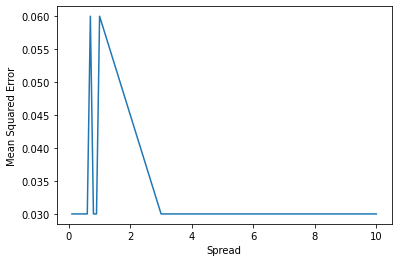

In [198]:
#plotting the spread value against mse
plt.plot(sigma_vals,mse_plt)
plt.xlabel("Spread")
plt.ylabel("Mean Squared Error")
plt.show()

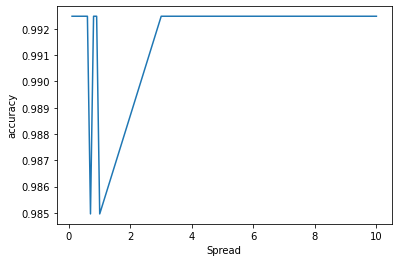

In [199]:
#plotting the spread value against accuracy
plt.plot(sigma_vals,accuracy_plt)
plt.xlabel("Spread")
plt.ylabel("accuracy")
plt.show()

In [203]:
#using kmeans and selecting 150 centers for the best sigma value
sigma_vals = [0.1,0.35,0.5,0.6,0.7,0.8,0.9,1,3,5,7.5,10]
mse_plt=[]
accuracy_plt=[]
analysis = pd.DataFrame([])
for i in sigma_vals:
    model2=rbf_nn(len(x_train),150,i,True)
    model2.fit_model(x_train,y_train)
    y_obtained=model2.predict(x_test)
    accuracy=model2.accuracy(y_obtained,y_test)
    mse_obtained=model.MSE(y_obtained,y_test)
    mse_obtained=round(mse_obtained,2)
    analysis = analysis.append(pd.DataFrame({'sigma': i, 'accuracy': accuracy,'mse':mse_obtained}, index=[0]), ignore_index=True)
    mse_plt.append(mse_obtained)
    accuracy_plt.append(accuracy)
analysis

,sigma,accuracy,mse
0,0.10,0.932331,0.27
1,0.35,0.947368,0.21
2,0.50,0.954887,0.18
3,0.60,0.954887,0.18
4,0.70,0.954887,0.18
5,0.80,0.932331,0.27
6,0.90,0.924812,0.30
7,1.00,0.917293,0.33
8,3.00,0.984962,0.06
9,5.00,0.984962,0.06


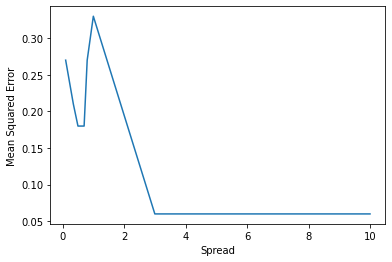

In [204]:
#plotting the spread value against mse
plt.plot(sigma_vals,mse_plt)
plt.xlabel("Spread")
plt.ylabel("Mean Squared Error")
plt.show()

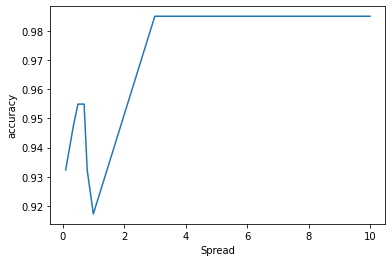

In [205]:
#plotting the spread value against accuracy
plt.plot(sigma_vals,accuracy_plt)
plt.xlabel("Spread")
plt.ylabel("accuracy")
plt.show()

### ANALYSIS:

Even in the above two models that we run for 150 centers chosen randomnly and using kmeans cluster technique we get the maximum accuracy and the minimal MSE at the sigma value = 3, which indicates that the spread parameter is independent on the number of centres to be choosen. 

From the analysis table obtained,The maximum accuracy obtained on the test data set by choosing 150 datapoints as centers is 0.992481 and the MSE is 0.03;where as using the K means method the maximum accuracy obtained is 0.984962 	 and MSE is 0.06.

The general observation is that as as the number of centers reduces the accuracy reduces and the computational resources used also reduces.So,an another challenge is to choose an optimal number of centers for the RBF
